In [1]:
from sogaPreprocessor import *
from producecfg import *
from libSOGA import *
import matplotlib.pyplot as plt

In [2]:
file = '../programs/SOGA/Toy.soga'
compiledFile = compile2SOGA(file)
cfg = produce_cfg(compiledFile)

In [3]:
start = time()
output = start_SOGA(cfg)
end = time()

output

Dist<['x', 'y', 'value'],pi: [0.08538642478870108, 0.4729189948636773, 0.16461357521129893, 0.2770810051363227] mu: [array([-0.8774541 , -0.31618115,  1.        ]), array([-0.39899352, -2.19698056,  1.        ]), array([0.45514271, 1.68271406, 0.        ]), array([0.68099801, 1.04299404, 0.        ])] sigma: [array([[0.522559  , 0.2838385 , 0.        ],
       [0.2838385 , 0.92575775, 0.        ],
       [0.        , 0.        , 0.        ]]), array([[0.75213895, 0.25641684, 0.        ],
       [0.25641684, 2.76925051, 0.        ],
       [0.        , 0.        , 0.        ]]), array([[0.64113088, 0.46169632, 0.        ],
       [0.46169632, 1.19254447, 0.        ],
       [0.        , 0.        , 0.        ]]), array([[0.6875746 , 0.0627238 , 0.        ],
       [0.0627238 , 2.18817139, 0.        ],
       [0.        , 0.        , 0.        ]])]>

# Scalability

In [ ]:
import time

# Scalability of SOGA
SOGA_800  = '../programs/SOGA/Privug/rasmus/Scalability/SOGA/scale/eval_soga_scale_800.soga'
SOGA_900  = '../programs/SOGA/Privug/rasmus/Scalability/SOGA/scale/eval_soga_scale_900.soga'
SOGA_1000  = '../programs/SOGA/Privug/rasmus/Scalability/SOGA/scale/eval_soga_scale_1000.soga'
SOGA_1100  = '../programs/SOGA/Privug/rasmus/Scalability/SOGA/scale/eval_soga_scale_1100.soga'
SOGA_1200  = '../programs/SOGA/Privug/rasmus/Scalability/SOGA/scale/eval_soga_scale_1200.soga'
SOGA_1300  = '../programs/SOGA/Privug/rasmus/Scalability/SOGA/scale/eval_soga_scale_1300.soga'
SOGA_1400  = '../programs/SOGA/Privug/rasmus/Scalability/SOGA/scale/eval_soga_scale_1400.soga'
SOGA_1500  = '../programs/SOGA/Privug/rasmus/Scalability/SOGA/scale/eval_soga_scale_1500.soga'
SOGA_1600  = '../programs/SOGA/Privug/rasmus/Scalability/SOGA/scale/eval_soga_scale_1600.soga'
SOGA_1700  = '../programs/SOGA/Privug/rasmus/Scalability/SOGA/scale/eval_soga_scale_1700.soga'
SOGA_1800  = '../programs/SOGA/Privug/rasmus/Scalability/SOGA/scale/eval_soga_scale_1800.soga'
SOGA_1900  = '../programs/SOGA/Privug/rasmus/Scalability/SOGA/scale/eval_soga_scale_1900.soga'
SOGA_2000  = '../programs/SOGA/Privug/rasmus/Scalability/SOGA/scale/eval_soga_scale_2000.soga'
SOGA_3000  = '../programs/SOGA/Privug/rasmus/Scalability/SOGA/scale/eval_soga_scale_3000.soga'
SOGA_5000  = '../programs/SOGA/Privug/rasmus/Scalability/SOGA/scale/eval_soga_scale_5000.soga'
SOGA_10000  = '../programs/SOGA/Privug/rasmus/Scalability/SOGA/scale/eval_soga_scale_10000.soga'


SOGA_800_COND  = 'programs/SOGA/Privug/rasmus/Scalability/SOGA/cond/eval_soga_scale_800.soga'
SOGA_900_COND  = 'programs/SOGA/Privug/rasmus/Scalability/SOGA/cond/eval_soga_scale_900.soga'
SOGA_1000_COND  = 'programs/SOGA/Privug/rasmus/Scalability/SOGA/cond/eval_soga_scale_1000.soga'
SOGA_1100_COND  = 'programs/SOGA/Privug/rasmus/Scalability/SOGA/cond/eval_soga_scale_1100.soga'
SOGA_1200_COND  = 'programs/SOGA/Privug/rasmus/Scalability/SOGA/cond/eval_soga_scale_1200.soga'
SOGA_1300_COND  = 'programs/SOGA/Privug/rasmus/Scalability/SOGA/cond/eval_soga_scale_1300.soga'
SOGA_1400_COND  = 'programs/SOGA/Privug/rasmus/Scalability/SOGA/cond/eval_soga_scale_1400.soga'


FILES_SOGA    = [(800,SOGA_800), (900,SOGA_900), (1000,SOGA_1000),(1100,SOGA_1100), (1200,SOGA_1200), (1300,SOGA_1300), (1400, SOGA_1400), (1500, SOGA_1500), (1600, SOGA_1600), (1700, SOGA_1700), (1800, SOGA_1800), (1900, SOGA_1900), (2000, SOGA_2000), (3000, SOGA_3000), (5000, SOGA_5000), (10000, SOGA_10000)]
FILES_SOGA_COND    = [(800,SOGA_800_COND), (900,SOGA_900_COND), (1000,SOGA_1000_COND),(1100,SOGA_1100_COND), (1200,SOGA_1200_COND), (1300,SOGA_1300_COND), (1400, SOGA_1400_COND), ]
NUM_VARS = [800,900,1000,1100,1200,1300,1400,1500, 1600, 1700, 1800, 1900, 2000, 3000, 5000, 10000]

In [ ]:
def soga_infer(file):
    compiled = compile2SOGA(file)
    cfg = produce_cfg(compiled)
    output = start_SOGA(cfg)
    return output

def time_soga(size, file):
    t_init = time.time()
    soga_infer(file)
    total_time = time.time() - t_init
    print(f'SOGA | Size {size} | Time {total_time}')
    return total_time

In [ ]:
times_soga       = [time_soga(size,file) for (size,file) in FILES_SOGA]

In [ ]:
NUM_VARS_Privug = [800,900,1000,1100,1200,1300,1400, 1500, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
times_privug    = [0.007296562194824219,0.0029883384704589844, 0.003086090087890625,  0.0032761096954345703, 0.0034737586975097656, 0.003620624542236328, 0.003820180892944336,
                  0.0038912296295166016,0.00494074821472168,0.007329702377319336, 0.009478569030761719, 0.012460470199584961, 0.01391911506652832, 0.01769399642944336,
                  0.019052743911743164, 0.022161006927490234, 0.022896289825439453]

times_privug_cond = [0.002747774124145508, 0.00436711311340332, 0.003152132034301758,0.0031952857971191406, 0.0030853748321533203, 0.003484487533569336,
                    0.004073619842529297,0.003667593002319336, 0.0049169063568115234, 0.007868766784667969, 0.008997917175292969,0.012352943420410156,
                    0.014581441879272461,0.01537466049194336, 0.02023148536682129, 0.02020549774169922,  0.0222170352935791 ]

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(7,4))
axs.plot(NUM_VARS,times_soga,'-o',label='SOGA')
axs.plot(NUM_VARS_Privug,times_privug,'-o',label='Privug')
#axs.axvline(x=1500, linestyle='dashed', label='SOGA max recursion depth')
axs.set_xlabel("Number nodes")
axs.set_ylabel("Seconds")
axs.legend();

In [1]:
from sogaPreprocessor import *
from producecfg import *
from libSOGA import *
import matplotlib.pyplot as plt

import time

def soga_infer(file):
    compiled = compile2SOGA(file)
    cfg = produce_cfg(compiled)
    output = start_SOGA(cfg)
    return output

def time_soga(size, file):
    t_init = time.time()
    soga_infer(file)
    total_time = time.time() - t_init
    print(f'SOGA | Size {size} | Time {total_time}')
    return total_time

SOGA_100  = '../programs/SOGA/Privug/rasmus/Scalability/SOGA/vars/eval_soga_scale_100.soga'
SOGA_250  = '../programs/SOGA/Privug/rasmus/Scalability/SOGA/vars/eval_soga_scale_250.soga'
SOGA_500  = '../programs/SOGA/Privug/rasmus/Scalability/SOGA/vars/eval_soga_scale_500.soga'
SOGA_1000  = '../programs/SOGA/Privug/rasmus/Scalability/SOGA/vars/eval_soga_scale_1000.soga'
SOGA_2000  = '../programs/SOGA/Privug/rasmus/Scalability/SOGA/vars/eval_soga_scale_2000.soga'
SOGA_4000  = '../programs/SOGA/Privug/rasmus/Scalability/SOGA/vars/eval_soga_scale_4000.soga'
SOGA_6000  = '../programs/SOGA/Privug/rasmus/Scalability/SOGA/vars/eval_soga_scale_6000.soga'


FILES_SOGA    = [(100,SOGA_100), (250,SOGA_250), (500,SOGA_500), (1000,SOGA_1000), (2000,SOGA_2000), (4000,SOGA_4000), (6000,SOGA_6000)]

NUM_VARS = [100, 250, 500, 1000, 2000, 4000, 6000]

times_soga       = [time_soga(size,file) for (size,file) in FILES_SOGA]

SOGA | Size 100 | Time 0.17337298393249512
SOGA | Size 250 | Time 0.36434054374694824
SOGA | Size 500 | Time 2.504552125930786
SOGA | Size 1000 | Time 11.259040594100952
SOGA | Size 2000 | Time 80.17547559738159
SOGA | Size 4000 | Time 552.7415518760681
SOGA | Size 6000 | Time 1609.1354005336761


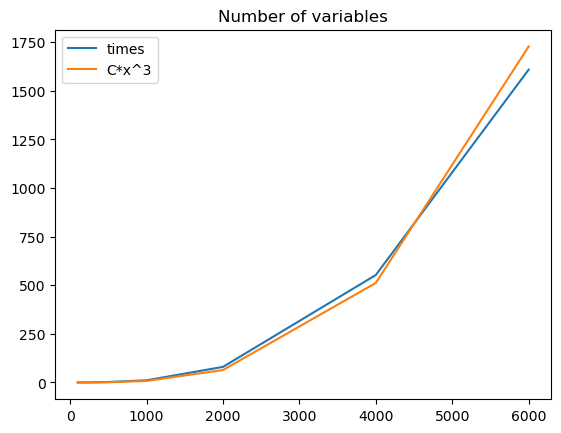

In [12]:
import matplotlib.pyplot as plt
import numpy as np

NUM_VARS = [100, 250, 500, 1000, 2000, 4000, 6000]
#times_soga = [0.18771123886108398, 0.6217093467712402, 4.117981195449829, 21.265605211257935, 157.69725155830383, 1402.505854845047, 4150.177237510681]
times_soga = [0.17337298393249512, 0.36434054374694824, 2.504552125930786, 11.259040594100952, 80.17547559738159, 552.7415518760681, 1609.1354005336761]

x = [100, 250, 500, 1000, 2000, 4000, 6000]

C = 8e-9
y = [C*NUM_VARS[i]**3 for i in range(len(NUM_VARS))]

plt.plot(x, times_soga, label='times')
plt.plot(x, y, label='C*x^3')
plt.title('Number of variables')
plt.legend()

In [5]:
#NUM_VARS_Privug = [800,900,1000,1100,1200,1300,1400, 1500, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
NUM_VARS_Privug = [50, 100, 200, 300, 400, 500, 800,900,1000,1100,1200,1300,1400, 1500, 2000, 3000, 4000, 5000, 6000]
#times_privug    = [0.007296562194824219,0.0029883384704589844, 0.003086090087890625,  0.0032761096954345703, 0.0034737586975097656, 0.003620624542236328, 0.003820180892944336,
 #                 0.0038912296295166016,0.00494074821472168,0.007329702377319336, 0.009478569030761719, 0.012460470199584961, 0.01391911506652832, 0.01769399642944336,
  #                0.019052743911743164, 0.022161006927490234, 0.022896289825439453]

times_privug = [0.0028066635131835938,0.004198551177978516,0.008395195007324219, 0.015213727951049805, 0.023733139038085938,0.03996086120605469,
                0.3027377128601074, 0.2061481475830078, 0.31394457817077637, 0.41750049591064453, 0.5550978183746338, 0.7143032550811768, 1.0748748779296875, 1.0867042541503906,
               3.4510347843170166, 12.85947036743164, 32.54612398147583, 67.13258385658264, 117.35088992118835]

#times_privug_cond = [0.002747774124145508, 0.00436711311340332, 0.003152132034301758,0.0031952857971191406, 0.0030853748321533203, 0.003484487533569336,
 #                   0.004073619842529297,0.003667593002319336, 0.0049169063568115234, 0.007868766784667969, 0.008997917175292969,0.012352943420410156,
  #                  0.014581441879272461,0.01537466049194336, 0.02023148536682129, 0.02020549774169922,  0.0222170352935791 ]
times_privug_cond = [0.0051724910736083984, 0.005353212356567383, 0.007938623428344727, 0.012955665588378906, 0.020505189895629883, 0.03209662437438965,
                    0.11232233047485352, 0.15134882926940918, 0.24138379096984863, 0.3682541847229004, 0.4311661720275879, 0.570500373840332, 0.7092206478118896,
                    1.0348293781280518, 2.27811598777771, 12.772864818572998, 34.05943155288696, 65.12331938743591, 120.42336559295654]

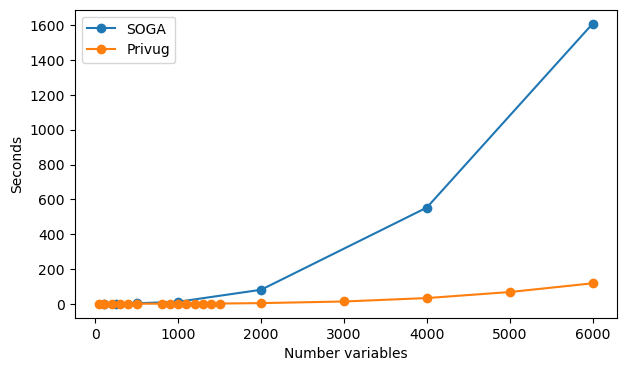

In [6]:
fig, axs = plt.subplots(1, 1, figsize=(7,4))
axs.plot(NUM_VARS,times_soga,'-o',label='SOGA')
axs.plot(NUM_VARS_Privug,times_privug,'-o',label='Privug')
#axs.axvline(x=1500, linestyle='dashed', label='SOGA max recursion depth')
axs.set_xlabel("Number variables")
axs.set_ylabel("Seconds")
axs.legend();

# New Implementation 

In [1]:
from sogaPreprocessor import *
from producecfg import *
from libSOGA import *
import time

programs = ['BayesPointMachine', 
            'BernoulliPrune', 
            'Burglar', 
            'ClickGraphPrune', 
            'ClinicalTrialPrune', 
            'CoinBias', 
            #'DigitRecognition', 
            'Grass',
            'IndianGPA',
            'MurderMistery',
            'NoisyOr',
            'SurveyUnbias',
            'ThreeCoins',
            'TrueSkills',
            'TwoCoins',
            'AQUA/Altermu',
            'AQUA/Altermu2',
            #'AQUA/NormalMixturesPrune',
            'AQUA/RadarQuery',
            'AQUA/TimeSeries'
            ]

for program in programs:
    file = '../programs/SOGA/' + program + '.soga'
    compiled = compile2SOGA(file)
    cfg = produce_cfg(compiled)
    start = time.time()
    output = start_SOGA(cfg)
    end = time.time()
    print()
    print(program + '| time: {} | mean: {} | var_list: '.format(np.round(end-start,2), output.gm.mean()) + str(output.var_list))


BayesPointMachine| time: 0.04 | mean: [ 0.01117781 -0.12016474 -0.27778036 -4.13952624 -2.86434177 -4.76773406
 -2.90703202 -2.19885417 -4.86233859] | var_list: ['w[0]', 'w[1]', 'w[2]', 'mean[0]', 'mean[1]', 'mean[2]', 'mean[3]', 'mean[4]', 'mean[5]']

BernoulliPrune| time: 1.24 | mean: [0.25679841 1.        ] | var_list: ['theta', 'y']

Burglar| time: 0.02 | mean: [2.82212318e-04 2.99344924e-03 3.27537935e-03 1.00000000e+00
 1.00000000e+00 1.00000000e+00] | var_list: ['earthquake', 'burglary', 'alarm', 'phoneWorking', 'maryWakes', 'called']

ClickGraphPrune| time: 5.38 | mean: [0.6140968  0.66050912 0.2789848  0.2789848  0.         0.        ] | var_list: ['simAll', 'sim', 'beta1', 'beta2', 'click0', 'click1']

ClinicalTrialPrune| time: 1.2 | mean: [0.75342099 0.6580324  0.34252677 0.         1.        ] | var_list: ['isEff', 'probTreated', 'probContr', 'ycontr', 'ytreat']

CoinBias| time: 0.33 | mean: [0.42587549 0.        ] | var_list: ['bias', 'y']

Grass| time: 0.06 | mean: [0.57

In [2]:
from sogaPreprocessor import *
from producecfg import *
from libSOGA import *
import time

programs = ['SensitivityExp/#variables/timeseries/Timeseries{}'.format(i) for i in range(1,11)]

for program in programs:
    file = '../programs/SOGA/' + program + '.soga'
    compiled = compile2SOGA(file)
    cfg = produce_cfg(compiled)
    start = time.time()
    output = start_SOGA(cfg)
    end = time.time()
    print()
    print(program + '| time: {} | mean: {} | var_list: '.format(np.round(end-start,2), output.gm.mean()) + str(output.var_list))


SensitivityExp/#variables/timeseries/Timeseries1| time: 0.01 | mean: [ 1.63295281  0.72960256  0.44171054 -1.09070023  0.99773101] | var_list: ['a', 'b', 'lamb', 'y0', 'y1']

SensitivityExp/#variables/timeseries/Timeseries2| time: 0.01 | mean: [ 1.28598333  1.06749718  0.48234158 -1.09070023  0.32806466  2.04777782] | var_list: ['a', 'b', 'lamb', 'y0', 'y1', 'y2']

SensitivityExp/#variables/timeseries/Timeseries3| time: 0.01 | mean: [ 1.51483374  0.72622643  0.52086594 -1.09070023  0.65585439  2.21532339
  1.99875284] | var_list: ['a', 'b', 'lamb', 'y0', 'y1', 'y2', 'y3']

SensitivityExp/#variables/timeseries/Timeseries4| time: 0.01 | mean: [ 1.38749337  0.91808199  0.4963393  -1.09070023  0.46235899  2.08102134
  1.47753533  2.36086996] | var_list: ['a', 'b', 'lamb', 'y0', 'y1', 'y2', 'y3', 'y4']

SensitivityExp/#variables/timeseries/Timeseries5| time: 0.01 | mean: [ 1.27469131  1.01968397  0.49666428 -1.09070023  0.30147826  1.94226786
  1.16379665  2.03552149  2.87915093] | var_lis

In [1]:
from sogaPreprocessor import *
from producecfg import *
from libSOGA import *
import time

programs = ['SensitivityExp/#branches/continuous/RandomWalk{}'.format(i) for i in range(1,16,2)]

for program in programs:
    file = '../programs/SOGA/' + program + '.soga'
    compiled = compile2SOGA(file)
    cfg = produce_cfg(compiled)
    start = time.time()
    output = start_SOGA(cfg)
    end = time.time()
    print()
    print(program + '| time: {} | mean: {} | var_list: '.format(np.round(end-start,2), output.gm.mean()) + str(output.var_list))


SensitivityExp/#branches/continuous/RandomWalk1| time: 0.03 | mean: [0.] | var_list: ['x']

SensitivityExp/#branches/continuous/RandomWalk3| time: 0.02 | mean: [0.] | var_list: ['x']

SensitivityExp/#branches/continuous/RandomWalk5| time: 0.08 | mean: [0.] | var_list: ['x']

SensitivityExp/#branches/continuous/RandomWalk7| time: 0.26 | mean: [0.] | var_list: ['x']

SensitivityExp/#branches/continuous/RandomWalk9| time: 1.01 | mean: [0.] | var_list: ['x']

SensitivityExp/#branches/continuous/RandomWalk11| time: 3.72 | mean: [0.] | var_list: ['x']

SensitivityExp/#branches/continuous/RandomWalk13| time: 18.84 | mean: [0.] | var_list: ['x']

SensitivityExp/#branches/continuous/RandomWalk15| time: 86.71 | mean: [0.] | var_list: ['x']


In [1]:
from sogaPreprocessor import *
from producecfg import *
from libSOGA import *
import time

programs = ['SensitivityExp/#branches/continuous/RandomWalk{}'.format(i) for i in range(1,16,2)]

for program in programs:
    file = '../programs/SOGA/' + program + '.soga'
    compiled = compile2SOGA(file)
    cfg = produce_cfg(compiled)
    start = time.time()
    output = start_SOGA(cfg, parallel=True)
    end = time.time()
    print()
    print(program + '| time: {} | mean: {} | var_list: '.format(np.round(end-start,2), output.gm.mean()) + str(output.var_list))


SensitivityExp/#branches/continuous/RandomWalk1| time: 3.93 | mean: [0.] | var_list: ['x']

SensitivityExp/#branches/continuous/RandomWalk3| time: 3.48 | mean: [0.] | var_list: ['x']

SensitivityExp/#branches/continuous/RandomWalk5| time: 0.28 | mean: [0.] | var_list: ['x']

SensitivityExp/#branches/continuous/RandomWalk7| time: 0.64 | mean: [0.] | var_list: ['x']

SensitivityExp/#branches/continuous/RandomWalk9| time: 1.82 | mean: [0.] | var_list: ['x']

SensitivityExp/#branches/continuous/RandomWalk11| time: 5.67 | mean: [0.] | var_list: ['x']

SensitivityExp/#branches/continuous/RandomWalk13| time: 21.99 | mean: [0.] | var_list: ['x']

SensitivityExp/#branches/continuous/RandomWalk15| time: 91.97 | mean: [0.] | var_list: ['x']


# New Implementation + R

In [1]:
from sogaPreprocessor import *
from producecfg import *
from libSOGA import *
import time

programs = ['BayesPointMachine', 
            'BernoulliPrune', 
            'Burglar', 
            'ClickGraphPrune', 
            'ClinicalTrialPrune', 
            'CoinBias', 
            #'DigitRecognition', 
            'Grass',
            'IndianGPA',
            'MurderMistery',
            'NoisyOr',
            'SurveyUnbias',
            'ThreeCoins',
            'TrueSkills',
            'TwoCoins',
            'AQUA/Altermu',
            'AQUA/Altermu2',
            #'AQUA/NormalMixturesPrune',
            'AQUA/RadarQuery',
            'AQUA/TimeSeries'
            ]

for program in programs:
    file = '../programs/SOGA/' + program + '.soga'
    compiled = compile2SOGA(file)
    cfg = produce_cfg(compiled)
    start = time.time()
    output = start_SOGA(cfg, useR=True)
    end = time.time()
    print()
    print(program + '| time: {} | mean: {} | var_list: '.format(np.round(end-start,2), output.gm.mean()) + str(output.var_list))


BayesPointMachine| time: 1.39 | mean: [ 0.01117781 -0.12016474 -0.27778036 -4.13952624 -2.86434177 -4.76773406
 -2.90703202 -2.19885417 -4.86233859] | var_list: ['w[0]', 'w[1]', 'w[2]', 'mean[0]', 'mean[1]', 'mean[2]', 'mean[3]', 'mean[4]', 'mean[5]']

BernoulliPrune| time: 4.65 | mean: [0.25681726 1.        ] | var_list: ['theta', 'y']

Burglar| time: 0.02 | mean: [2.82212318e-04 2.99344924e-03 3.27537935e-03 1.00000000e+00
 1.00000000e+00 1.00000000e+00] | var_list: ['earthquake', 'burglary', 'alarm', 'phoneWorking', 'maryWakes', 'called']

ClickGraphPrune| time: 18.7 | mean: [0.61401138 0.66059754 0.27903789 0.27903789 0.         0.        ] | var_list: ['simAll', 'sim', 'beta1', 'beta2', 'click0', 'click1']

ClinicalTrialPrune| time: 7.39 | mean: [0.75341266 0.65793804 0.34257591 0.         1.        ] | var_list: ['isEff', 'probTreated', 'probContr', 'ycontr', 'ytreat']

CoinBias| time: 2.0 | mean: [0.42586231 0.        ] | var_list: ['bias', 'y']

Grass| time: 0.03 | mean: [0.57

In [1]:
from sogaPreprocessor import *
from producecfg import *
from libSOGA import *
import time

programs = ['SensitivityExp/#variables/timeseries/Timeseries{}'.format(i) for i in range(1,11)]

for program in programs:
    file = '../programs/SOGA/' + program + '.soga'
    compiled = compile2SOGA(file)
    cfg = produce_cfg(compiled)
    start = time.time()
    output = start_SOGA(cfg, useR=True)
    end = time.time()
    print()
    print(program + '| time: {} | mean: {} | var_list: '.format(np.round(end-start,2), output.gm.mean()) + str(output.var_list))


SensitivityExp/#variables/timeseries/Timeseries1| time: 0.98 | mean: [ 1.63295913  0.72959986  0.44173355 -1.09070023  0.99771497] | var_list: ['a', 'b', 'lamb', 'y0', 'y1']

SensitivityExp/#variables/timeseries/Timeseries2| time: 0.13 | mean: [ 1.28597012  1.06749934  0.48233714 -1.09070023  0.32805293  2.04779997] | var_list: ['a', 'b', 'lamb', 'y0', 'y1', 'y2']

SensitivityExp/#variables/timeseries/Timeseries3| time: 0.17 | mean: [ 1.51481343  0.72624953  0.52083188 -1.09070023  0.65585802  2.21537493
  1.99863561] | var_list: ['a', 'b', 'lamb', 'y0', 'y1', 'y2', 'y3']

SensitivityExp/#variables/timeseries/Timeseries4| time: 0.15 | mean: [ 1.38748353  0.91807443  0.49632985 -1.09070023  0.46235926  2.08105628
  1.4775214   2.36067325] | var_list: ['a', 'b', 'lamb', 'y0', 'y1', 'y2', 'y3', 'y4']

SensitivityExp/#variables/timeseries/Timeseries5| time: 0.16 | mean: [ 1.27467336  1.01968676  0.49665553 -1.09070023  0.30146551  1.94229013
  1.16376376  2.03531606  2.87881235] | var_lis

In [2]:
from sogaPreprocessor import *
from producecfg import *
from libSOGA import *
import time

programs = ['SensitivityExp/#branches/continuous/RandomWalk{}'.format(i) for i in range(1,16,2)]

for program in programs:
    file = '../programs/SOGA/' + program + '.soga'
    compiled = compile2SOGA(file)
    cfg = produce_cfg(compiled)
    start = time.time()
    output = start_SOGA(cfg, useR=True)
    end = time.time()
    print()
    print(program + '| time: {} | mean: {} | var_list: '.format(np.round(end-start,2), output.gm.mean()) + str(output.var_list))


SensitivityExp/#branches/continuous/RandomWalk1| time: 0.18 | mean: [0.] | var_list: ['x']

SensitivityExp/#branches/continuous/RandomWalk3| time: 0.53 | mean: [0.] | var_list: ['x']

SensitivityExp/#branches/continuous/RandomWalk5| time: 0.93 | mean: [0.] | var_list: ['x']

SensitivityExp/#branches/continuous/RandomWalk7| time: 1.72 | mean: [0.] | var_list: ['x']

SensitivityExp/#branches/continuous/RandomWalk9| time: 3.55 | mean: [0.] | var_list: ['x']

SensitivityExp/#branches/continuous/RandomWalk11| time: 14.78 | mean: [0.] | var_list: ['x']

SensitivityExp/#branches/continuous/RandomWalk13| time: 46.36 | mean: [0.] | var_list: ['x']

SensitivityExp/#branches/continuous/RandomWalk15| time: 171.32 | mean: [0.] | var_list: ['x']
